# My first test of geological modeling with GemPy - LP case study

***
Based on ch1-1_Basics.ipynb from Gempy tutorials
***

Here we test the most important steps of modeling with GemPy and we introduce essential objects and functions. Based on the LP cas study, We will illustrate how to:
- import and create input data for modeling in GemPy
- return and visualize input data
- generate a 3D geological model in GemPy
- visualize a model directly in GemPy

***

## The LP case study: simple folded stratigraphy and several faults

Our model is defined within an exahedron, with an extent of 7000 x 6700 x 2500 m along x, y, z directions. It includes one fault (Fault_05) and five stratigraphic units (from top to bottom):

- 01_Nant_Ffrancon_Fm
- 02_Marchlyn_Fm
- 03_Bronllwyd_Grit_Fm
- 04_Llanberis_Slates_Fm
- 05_Fachwen_Fm
- basement (automatically added by GemPy)

## Preparing the Python environment

For modeling with GemPy, we first need to import it. We should also import any other packages we want to utilize in our Python environment.Typically, we will also require `NumPy` and `Matplotlib` when working with GemPy. At this point, we can further customize some settings as desired, e.g. the size of figures or, as we do here, the way that `Matplotlib` figures are displayed in our notebook (`%matplotlib inline`).

In [2]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

## Importing and creating a set of input data

The data used for the construction of a model in GemPy is stored in Python objects. The main data classes are:

    -  Surface_points
    -  Orientations
    -  Grid
    -  Surfaces
    -  Series
    -  Additional data
    -  Faults
    
We will see each of this class in further detail in the future.

Most of data can also be generated from raw data that comes in the form of CSV-files (CSV = comma-separated values). Such files might be attained by exporting model data from a different or by simply creating it in a spreadsheet software.

In this tutorial, all input data is created by importing such CSV-files. These **exemplary files** can be found in the `input_data` folder in the root folder of GemPy. 
The data include $x$-, $y$- and $z$-coordinate values for all surface points and orientation measurements. For the latter, poles, azimuth and polarity are additionally included. Surface points are furthermore assigned a formation. This might be a lithological unit such as "Sandstone" or a structural feature such as "Main Fault". It is decisive to remember that, in GemPy, interface position points mark the **bottom** of a layer. If such points are needed to resemble a top of a formation (e.g. when modeling an intrusion), this can be achieved by defining a respectively inverted orientation measurement.

**NOTE:** This convention is the opposite as in other geomodeling packages such as SKUA-GOCAD or MOVE. The stratigraphy is not corrected for this issue here.

As we generate our `Data` from CSV-files, we also have to define our model's real extent in $x$, $y$ and $z$, as well as declare a desired resolution for each axis. This resolution will in turn determine the number of voxels used during modeling. Here, we rely on a resolution of 70x67x25, amounting to 117,250 voxels. The model extent should be chosen in a way that it contains all relevant data in a representative space. As our model voxels are not cubes, but prisms, the resolution can take a different shape than the extent. We don't recommend going much higher than 100 cells in every direction (1,000,000 voxels), as higher resolutions will become increasingly difficult to compute.

In [3]:
geo_model = gp.create_model('LPproject')

In [4]:
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model,
             [420100.,427100.,5880500.,5887200.,-1000.,1500.],
             [70,67,25],
             path_o = "all_orientations.csv",
             path_i = "all_surface_fault_points_light_faults.csv",
             default_values=True); #%%

Active grids: ['regular']


In [5]:
geo_model.modify_order_surfaces??

The input data can then be listed using the command `get_data`. Note that the order of formations and respective allocation to series is still completely arbitrary. We will fix this in the following.

In [4]:
gp.get_data(geo_model, 'surface_points').head()

X             Y       Z       X_r       Y_r       Z_r  \
0  424369.9941  5.884636e+06 -1.4946  0.583732  0.553221  0.472117   
1  424390.6147  5.884622e+06  1.0231  0.585114  0.552289  0.472285   
2  424411.2352  5.884608e+06  3.5407  0.586497  0.551356  0.472454   
3  424431.8558  5.884594e+06  6.0584  0.587879  0.550424  0.472623   
4  424452.4757  5.884580e+06  8.5759  0.589262  0.549491  0.472792   

                surface          series  id  order_series        smooth  
0  03_Bronllwyd_Grit_Fm  Default series   1             1  1.000000e-08  
1  03_Bronllwyd_Grit_Fm  Default series   1             1  1.000000e-08  
2  03_Bronllwyd_Grit_Fm  Default series   1             1  1.000000e-08  
3  03_Bronllwyd_Grit_Fm  Default series   1             1  1.000000e-08  
4  03_Bronllwyd_Grit_Fm  Default series   1             1  1.000000e-08

In [5]:
gp.get_data(geo_model, 'orientations').head()

X          Y        Z       X_r       Y_r       Z_r       G_x  \
43  426802.0  5886299.0  448.579  0.746776  0.664715  0.502290  0.836516   
44  420843.0  5884201.0  202.204  0.347280  0.524064  0.485773  0.735148   
45  425432.0  5884600.0  351.198  0.654930  0.550813  0.495761 -0.324834   
46  426697.0  5885889.0  297.239  0.739736  0.637229  0.492144  0.826969   
47  425946.0  5886046.0  158.606  0.689389  0.647754  0.482850 -0.865498   

         G_y       G_z  dip  azimuth  polarity               surface  \
43 -0.224144  0.500000   60      105         1  03_Bronllwyd_Grit_Fm   
44 -0.553974  0.390731   67      127         1  03_Bronllwyd_Grit_Fm   
45 -0.244780  0.913545   24      233         1  03_Bronllwyd_Grit_Fm   
46 -0.284748  0.484810   61      109         1  03_Bronllwyd_Grit_Fm   
47  0.030224  0.500000   60      272         1  03_Bronllwyd_Grit_Fm   

            series  id  order_series  smooth  
43  Default series   1             1    0.01  
44  Default series   1             1    0.01  
45  Default series   1             1    0.01  
46  Default series   1             1    0.01  
47  Default series   1             1    0.01

## Declaring the sequential order of geological formations

- TODO  @Fabian update this

We want our geological units to appear in the correct order relative to age. Such order might for example be given by a depositional sequence of stratigraphy, unconformities due to erosion or other lithological genesis events such as igneous intrusions. A similar age-related order is to be declared for the faults in our model.
In GemPy, the function *set_series* is used to assign formations to different sequential series via declaration in a Python dictionary.

Defining the correct order of series is vital to the construction of the model! If you are using Python 3.6, the age-related order will already be defined by the order of key entries, i.e. the first entry is the youngest series, the last one the oldest. For older versions of Python, you will have to specify the correct order as a separate list attribute "*order_series*" (see cell below).

You can assign several surfaces to one series. The order of the units within such as series is only relevant for the color code, thus we recommend to be consistent. You can define this order via another attribute "*order_formations*" or by using the specific command *set_order_formations*. (If the order of the pile differs from the final result the color of the interfaces and input data will be different. ?)

Every fault is treated as an independent series and have to be at set at the **top of the pile**. The relative order between the distinct faults defines the tectonic relation between them (first entry is the youngest).

In a model with simple sequential stratigraphy, all layer formations can be assigned to one single series without a problem. All unit boundaries and their order would then be given by interface points. However, to model more complex lithostratigraphical relations and interactions, the definition of separate series becomes important. For example, you would need to declare a "newer" series to model an unconformity or an intrusion that disturbs older stratigraphy.

By default we create a simple sequence infered by the data:

Our example model comprises five main layers (plus an underlying basement that is automatically generated by GemPy) and 13 faults. Assuming a simple stratigraphy where each younger unit was deposited onto the underlying older one, we can assign these layer formations to one series called "Strat_Series". For the fault, we declare a respective "Fault_xx" in the `set_series` dictionary. We could give any other names to these series, the formations however have to be referred to as named in the input data.

In [6]:
geo_model.surfaces

surface          series  order_surfaces  isBasement    color vertices edges  id
0        03_Bronllwyd_Grit_Fm  Default series               1       False  #015482      NaN   NaN   1
1              02_Marchlyn_Fm  Default series               2       False  #9f0052      NaN   NaN   2
2         01_Nant_Ffrancon_Fm  Default series               3       False  #ffbe00      NaN   NaN   3
3      04_Llanberis_Slates_Fm  Default series               4       False  #728f02      NaN   NaN   4
4               05_Fachwen_Fm  Default series               5       False  #443988      NaN   NaN   5
5                    Fault_01  Default series               6       False  #ff3f20      NaN   NaN   6
6                    Fault_02  Default series               7       False  #325916      NaN   NaN   7
7                    Fault_03  Default series               8       False  #5DA629      NaN   NaN   8
8                    Fault_04  Default series               9       False  #acc2d9      NaN   NaN   9
9                    Fault_05  Default series              10       False  #56ae57      NaN   NaN  10
10                   Fault_07  Default series              11       False  #b2996e      NaN   NaN  11
11                   Fault_08  Default series              12       False  #a8ff04      NaN   NaN  12
12                   Fault_09  Default series              13       False  #69d84f      NaN   NaN  13
13                   Fault_10  Default series              14       False  #894585      NaN   NaN  14
14                   Fault_11  Default series              15       False  #70b23f      NaN   NaN  15
15                   Fault_13  Default series              16       False  #d4ffff      NaN   NaN  16
16                   Fault_14  Default series              17       False  #65ab7c      NaN   NaN  17
17                   Fault_15  Default series              18       False  #952e8f      NaN   NaN  18
18  00_above_Nant_Ffrancon_Fm  Default series              19       False  #fcfc81      NaN   NaN  19
19                   basement        Basement               1        True  #a5a391      NaN   NaN  20

In [7]:
gp.map_series_to_surfaces(geo_model,
                          {"Fault_01":'Fault_01',
                           "Fault_02":'Fault_02',
                           "Fault_03":'Fault_03',
                           "Fault_04":'Fault_04',
                           "Fault_05":'Fault_05',
                           "Fault_07":'Fault_07',
                           "Fault_08":'Fault_08',
                           "Fault_09":'Fault_09',
                           "Fault_10":'Fault_10',
                           "Fault_11":'Fault_11',
                           "Fault_13":'Fault_13',
                           "Fault_14":'Fault_14',
                           "Fault_15":'Fault_15',
                           "Strat_Series":('00_above_Nant_Ffrancon_Fm','01_Nant_Ffrancon_Fm','02_Marchlyn_Fm','03_Bronllwyd_Grit_Fm','04_Llanberis_Slates_Fm','05_Fachwen_Fm','basement')},
                          remove_unused_series=True);

In [8]:
geo_model.surfaces

surface        series  order_surfaces  isBasement    color vertices edges  id
5                    Fault_01      Fault_01               1       False  #ff3f20      NaN   NaN   1
6                    Fault_02      Fault_02               1       False  #325916      NaN   NaN   2
7                    Fault_03      Fault_03               1       False  #5DA629      NaN   NaN   3
8                    Fault_04      Fault_04               1       False  #acc2d9      NaN   NaN   4
9                    Fault_05      Fault_05               1       False  #56ae57      NaN   NaN   5
10                   Fault_07      Fault_07               1       False  #b2996e      NaN   NaN   6
11                   Fault_08      Fault_08               1       False  #a8ff04      NaN   NaN   7
12                   Fault_09      Fault_09               1       False  #69d84f      NaN   NaN   8
13                   Fault_10      Fault_10               1       False  #894585      NaN   NaN   9
14                   Fault_11      Fault_11               1       False  #70b23f      NaN   NaN  10
15                   Fault_13      Fault_13               1       False  #d4ffff      NaN   NaN  11
16                   Fault_14      Fault_14               1       False  #65ab7c      NaN   NaN  12
17                   Fault_15      Fault_15               1       False  #952e8f      NaN   NaN  13
0        03_Bronllwyd_Grit_Fm  Strat_Series               1       False  #015482      NaN   NaN  14
1              02_Marchlyn_Fm  Strat_Series               2       False  #9f0052      NaN   NaN  15
2         01_Nant_Ffrancon_Fm  Strat_Series               3       False  #ffbe00      NaN   NaN  16
3      04_Llanberis_Slates_Fm  Strat_Series               4       False  #728f02      NaN   NaN  17
4               05_Fachwen_Fm  Strat_Series               5       False  #443988      NaN   NaN  18
18  00_above_Nant_Ffrancon_Fm  Strat_Series               6       False  #fcfc81      NaN   NaN  19
19                   basement  Strat_Series               7        True  #a5a391      NaN   NaN  20

In [9]:
geo_model.series

order_series BottomRelation
Fault_01                 1        Erosion
Fault_02                 2        Erosion
Fault_03                 3        Erosion
Fault_04                 4        Erosion
Fault_05                 5        Erosion
Fault_07                 6        Erosion
Fault_08                 7        Erosion
Fault_09                 8        Erosion
Fault_10                 9        Erosion
Fault_11                10        Erosion
Fault_13                11        Erosion
Fault_14                12        Erosion
Fault_15                13        Erosion
Strat_Series            14        Erosion

In [10]:
geo_model.series.df.index[:-1]

CategoricalIndex(['Fault_01', 'Fault_02', 'Fault_03', 'Fault_04', 'Fault_05',
                  'Fault_07', 'Fault_08', 'Fault_09', 'Fault_10', 'Fault_11',
                  'Fault_13', 'Fault_14', 'Fault_15'],
                 categories=['Fault_01', 'Fault_02', 'Fault_03', 'Fault_04', 'Fault_05', 'Fault_07', 'Fault_08', 'Fault_09', ...], ordered=False, dtype='category')

Here we set faults as faults.

In [11]:

geo_model.set_is_fault(geo_model.series.df.index[:-1])

Fault colors changed. If you do not like this behavior, set change_color to False.


isFault  isFinite
Fault_01         True     False
Fault_02         True     False
Fault_03         True     False
Fault_04         True     False
Fault_05         True     False
Fault_07         True     False
Fault_08         True     False
Fault_09         True     False
Fault_10         True     False
Fault_11         True     False
Fault_13         True     False
Fault_14         True     False
Fault_15         True     False
Strat_Series    False     False

Here we set all faults as finite faults, with their tipline within the modelling domain.

In [12]:
geo_model.set_is_finite_fault(['Fault_05'],toggle=True)

isFault  isFinite
Fault_01         True     False
Fault_02         True     False
Fault_03         True     False
Fault_04         True     False
Fault_05         True      True
Fault_07         True     False
Fault_08         True     False
Fault_09         True     False
Fault_10         True     False
Fault_11         True     False
Fault_13         True     False
Fault_14         True     False
Fault_15         True     False
Strat_Series    False     False

Here we explore fault relationships.

In [13]:
geo_model.faults.df

isFault  isFinite
Fault_01         True     False
Fault_02         True     False
Fault_03         True     False
Fault_04         True     False
Fault_05         True      True
Fault_07         True     False
Fault_08         True     False
Fault_09         True     False
Fault_10         True     False
Fault_11         True     False
Fault_13         True     False
Fault_14         True     False
Fault_15         True     False
Strat_Series    False     False

In [14]:
geo_model.faults.faults_relations_df

Fault_01  Fault_02  Fault_03  Fault_04  Fault_05  Fault_07  \
Fault_01         False     False     False     False     False     False   
Fault_02         False     False     False     False     False     False   
Fault_03         False     False     False     False     False     False   
Fault_04         False     False     False     False     False     False   
Fault_05         False     False     False     False     False     False   
Fault_07         False     False     False     False     False     False   
Fault_08         False     False     False     False     False     False   
Fault_09         False     False     False     False     False     False   
Fault_10         False     False     False     False     False     False   
Fault_11         False     False     False     False     False     False   
Fault_13         False     False     False     False     False     False   
Fault_14         False     False     False     False     False     False   
Fault_15         False     False     False     False     False     False   
Strat_Series     False     False     False     False     False     False   

              Fault_08  Fault_09  Fault_10  Fault_11  Fault_13  Fault_14  \
Fault_01         False     False     False     False     False     False   
Fault_02         False     False     False     False     False     False   
Fault_03         False     False     False     False     False     False   
Fault_04         False     False     False     False     False     False   
Fault_05         False     False     False     False     False     False   
Fault_07         False     False     False     False     False     False   
Fault_08         False     False     False     False     False     False   
Fault_09         False     False     False     False     False     False   
Fault_10         False     False     False     False     False     False   
Fault_11         False     False     False     False     False     False   
Fault_13         False     False     False     False     False     False   
Fault_14         False     False     False     False     False     False   
Fault_15         False     False     False     False     False     False   
Strat_Series     False     False     False     False     False     False   

              Fault_15  Strat_Series  
Fault_01         False          True  
Fault_02         False          True  
Fault_03         False          True  
Fault_04         False          True  
Fault_05         False          True  
Fault_07         False          True  
Fault_08         False          True  
Fault_09         False          True  
Fault_10         False          True  
Fault_11         False          True  
Fault_13         False          True  
Fault_14         False          True  
Fault_15         False          True  
Strat_Series     False         False

In [15]:
geo_model.faults.n_faults

13

In [16]:
geo_model.faults.count_faults(['Fault_05'])

['Fault_05']

### Returning information from our input data

Our model input data, here named "*geo_model*", contains all the information that is essential for the construction of our model. You can access different types of information by using `gp.get_data` or simply by accessiong the atrribues.

We can, for example, return the coordinates of our modeling grid via:

In [17]:
geo_model.grid

Grid Object. Values: 
array([[ 4.20150000e+05,  5.88054786e+06, -9.82142857e+02],
       [ 4.20150000e+05,  5.88054786e+06, -8.79464286e+02],
       [ 4.20150000e+05,  5.88054786e+06, -7.76785714e+02],
       ...,
       [ 4.27050000e+05,  5.88715214e+06,  1.27678571e+03],
       [ 4.27050000e+05,  5.88715214e+06,  1.37946429e+03],
       [ 4.27050000e+05,  5.88715214e+06,  1.48214286e+03]])

As mentioned before, GemPy's core algorithm is based on interpolation of two types of data:
- surface_points
and
- orientation measurements

(if you want to know more on how this this interpolation algorithm works, checkout our chapter on the theory behind GemPy).

We introduced the function *get_data* above. You can also specify which kind of data you want to call, by declaring the string attribute "*dtype*" to be either "interfaces" (surface points) or "foliations" (orientation measurements). 

#### Interfaces Dataframe:

In [18]:
gp.get_data(geo_model, 'surface_points')

X             Y            Z       X_r       Y_r       Z_r  \
6053  424206.217773  5.883052e+06  -722.016968  0.572752  0.447035  0.423812   
6054  425040.057617  5.882351e+06  1416.398682  0.628654  0.400016  0.567173   
6055  424860.021484  5.882099e+06  1427.837280  0.616584  0.383111  0.567940   
6056  424672.783691  5.881755e+06  1498.789795  0.604031  0.360090  0.572697   
6057  424574.248535  5.881588e+06  1538.491333  0.597425  0.348894  0.575358   
...             ...           ...          ...       ...       ...       ...   
6048  423141.310800  5.885465e+06  -565.963900  0.501360  0.608782  0.434274   
6049  423160.108500  5.885452e+06  -576.494000  0.502620  0.607932  0.433568   
6050  423179.103100  5.885439e+06  -586.487700  0.503894  0.607073  0.432898   
6051  423198.202600  5.885426e+06  -596.195700  0.505174  0.606209  0.432247   
6052  423205.687300  5.885421e+06  -600.000000  0.505676  0.605871  0.431992   

            surface        series  id  order_series        smooth  
6053       Fault_01      Fault_01   1             1  1.000000e-08  
6054       Fault_01      Fault_01   1             1  1.000000e-08  
6055       Fault_01      Fault_01   1             1  1.000000e-08  
6056       Fault_01      Fault_01   1             1  1.000000e-08  
6057       Fault_01      Fault_01   1             1  1.000000e-08  
...             ...           ...  ..           ...           ...  
6048  05_Fachwen_Fm  Strat_Series  18            14  1.000000e-08  
6049  05_Fachwen_Fm  Strat_Series  18            14  1.000000e-08  
6050  05_Fachwen_Fm  Strat_Series  18            14  1.000000e-08  
6051  05_Fachwen_Fm  Strat_Series  18            14  1.000000e-08  
6052  05_Fachwen_Fm  Strat_Series  18            14  1.000000e-08  

[6545 rows x 11 columns]

#### Orientations Dataframe:

In [19]:
gp.get_data(geo_model, 'orientations')

X          Y        Z       X_r       Y_r       Z_r       G_x  \
43  426802.0  5886299.0  448.579  0.746776  0.664715  0.502290  0.836516   
44  420843.0  5884201.0  202.204  0.347280  0.524064  0.485773  0.735148   
45  425432.0  5884600.0  351.198  0.654930  0.550813  0.495761 -0.324834   
46  426697.0  5885889.0  297.239  0.739736  0.637229  0.492144  0.826969   
47  425946.0  5886046.0  158.606  0.689389  0.647754  0.482850 -0.865498   
..       ...        ...      ...       ...       ...       ...       ...   
82  422227.0  5886414.0  379.978  0.440064  0.672425  0.497691 -0.084565   
83  419873.0  5883616.0  148.475  0.282250  0.484845  0.482171  0.676915   
84  422971.0  5886887.0  224.003  0.489942  0.704135  0.487234 -0.151876   
0   426378.0  5881440.0  564.144  0.718350  0.338964  0.510037  0.639436   
1   426143.0  5881780.0  490.532  0.702596  0.361758  0.505102  0.719846   

         G_y       G_z  dip  azimuth  polarity                    surface  \
43 -0.224144  0.500000   60      105         1       03_Bronllwyd_Grit_Fm   
44 -0.553974  0.390731   67      127         1       03_Bronllwyd_Grit_Fm   
45 -0.244780  0.913545   24      233         1       03_Bronllwyd_Grit_Fm   
46 -0.284748  0.484810   61      109         1       03_Bronllwyd_Grit_Fm   
47  0.030224  0.500000   60      272         1       03_Bronllwyd_Grit_Fm   
..       ...       ...  ...      ...       ...                        ...   
82 -0.397848  0.913545   24      192         1              05_Fachwen_Fm   
83 -0.725902  0.121869   83      137         1              05_Fachwen_Fm   
84  0.084186  0.984808   10      299         1              05_Fachwen_Fm   
0  -0.662156  0.390731   67      136         1  00_above_Nant_Ffrancon_Fm   
1  -0.262003  0.642788   50      110         1  00_above_Nant_Ffrancon_Fm   

          series  id  order_series  smooth  
43  Strat_Series  14            14    0.01  
44  Strat_Series  14            14    0.01  
45  Strat_Series  14            14    0.01  
46  Strat_Series  14            14    0.01  
47  Strat_Series  14            14    0.01  
..           ...  ..           ...     ...  
82  Strat_Series  18            14    0.01  
83  Strat_Series  18            14    0.01  
84  Strat_Series  18            14    0.01  
0   Strat_Series  19            14    0.01  
1   Strat_Series  19            14    0.01  

[85 rows x 17 columns]

Notice that now all **surfaces** have been assigned to a **series** and are displayed in the correct order (from young to old).

### Visualizing input data

We can also visualize our input data. This might for example be useful to check if all points and measurements are defined the way we want them to. Using the function *plot_data*, we attain a 2D projection of our data points onto a plane of chosen *direction* (we can choose this attribute to be either $x$, $y$ or $z$). 

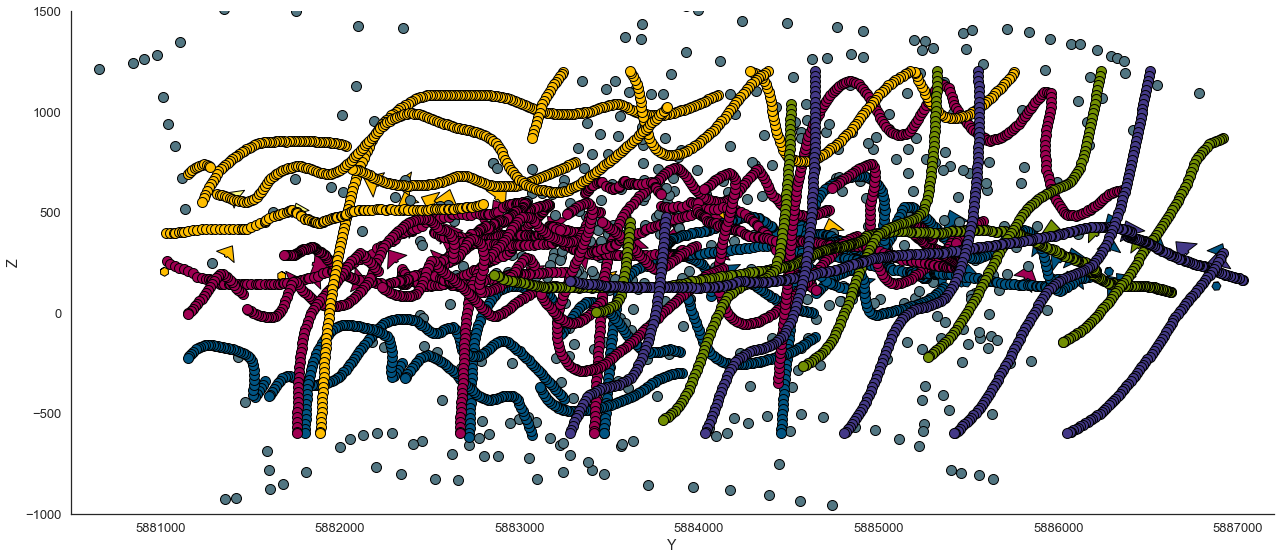

In [20]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='x');

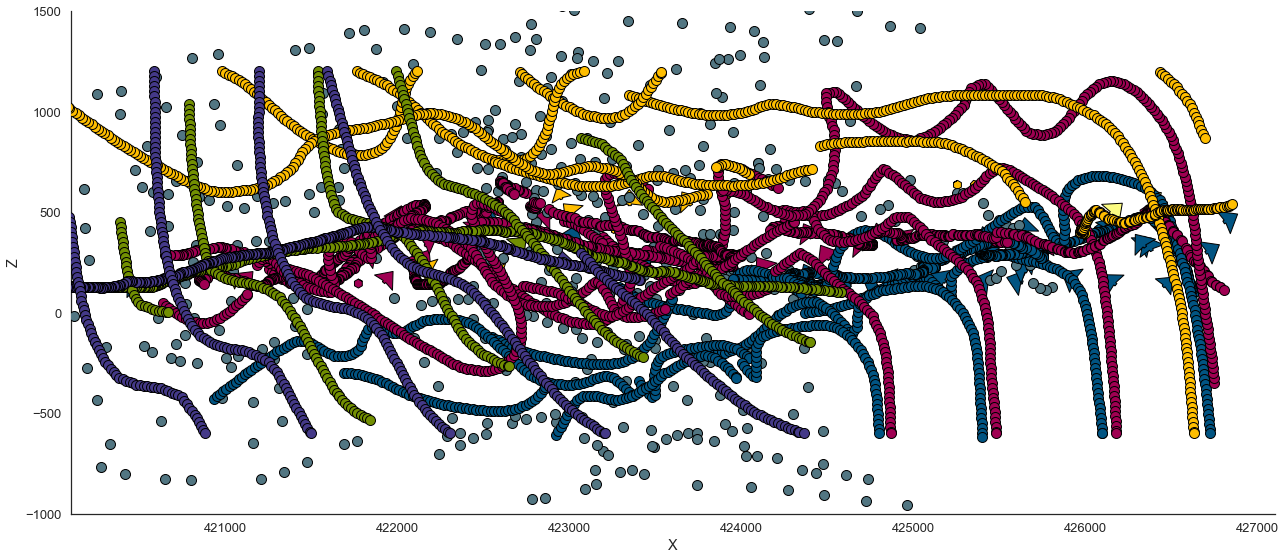

In [21]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='y');

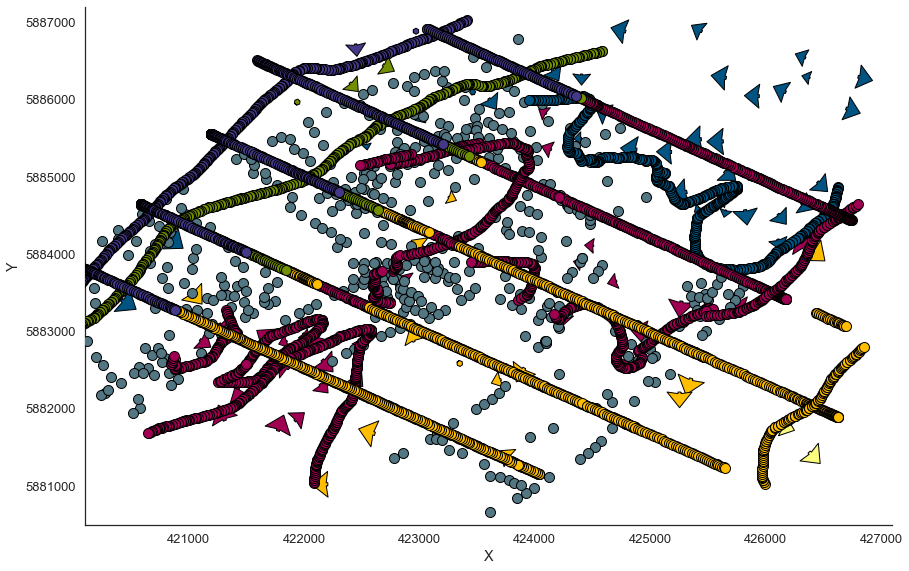

In [22]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z');

Using *plot_data_3D*, we can also visualize this data in 3D. Note that direct 3D visualization in GemPy requires [the Visualization Toolkit](https://www.vtk.org/) (VTK) to be installed.

All 3D VTK plots in GemPy are interactive. This means that we can drag and drop any data poit and measurement. The perpendicular axis views in VTK are particularly useful to move points solely on a desired 2D plane. Any changes will then be stored permanently in the "InputData" dataframe. If we want to reset our data points, we will then need to reload our original input data.

Executing the cell below will open a new window with a 3D interactive plot of our data.

In [23]:
gp.plot.plot_3D(geo_model);

KeyboardInterrupt: 

### Model generation

Once we have made sure that we have defined all our primary information as desired in our object `DataManagement.InputData` (named `geo_data` in these tutorials), we can continue with the next step towards creating our geological model: preparing the input data for interpolation.

This is done by generating an `InterpolatorData` object (named `interp_data` in these tutorials) from our `InputData` object via the following function:

In [33]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_run',
                          verbose=['cov_gradients'])


Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  13
Compilation Done!


This function rescales the extent and coordinates of the original data (and store it in the attribute `geo_data_res` which behaves as a usual `InputData` object) and adds mathematical parameters that are needed for conducting the interpolation. The computation of this step may take a while, as it also compiles a theano function which is required for the model computation. However, should this not be needed, we can skip it by declaring `compile_theano = False` in the function.

Furthermore, this preparation process includes an assignment of numbers to each formation. Note that GemPy's always creates a default basement formation as the last formation number. Afterwards, numbers are allocated from youngest to oldest as defined by the sequence of series and formations. On the property `formations` on our interpolation data, we can find out which number has been assigned to which formation:

The parameters used for the interpolation can be returned using the function `get_kriging_parameters`. These are generated automatically from the orginal data, but can be changed if needed. However, users should be careful doing so, if they do not fully understand their significance.

In [25]:
gp.get_data(geo_model, 'kriging')

values
range                                                 10007
$C_o$                                           2.38429e+06
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
nugget grad                                            0.01
nugget scalar                                         1e-06

At this point, we have all we need to compute our full model via `compute_model`. By default, this will return two separate solutions in the form of arrays. The first gives information on the lithological formations, the second on the fault network in the model. These arrays consist of two subarrays as entries each:

1. Lithology block model solution:
    + Entry [0]: This array shows what kind of lithological formation is found in each voxel, as indicated by a respective formation_number.
    + Entry [1]: Potential field array that represents the orientation of lithological units and layers in the block model.
2. Fault network block model solution:
    + Entry [0]: Array in which all fault-separated areas of the model are represented by a distinct number contained in each voxel.
    + Entry [1}: Potential field array related to the fault network in the block model.
    
Below, we illustrate these different model solutions and how they can be used.

In [26]:
geo_model.additional_data.structure_data

values
isLith                                                                    True
isFault                                                                   True
number faults                                                               13
number surfaces                                                             18
number series                                                               14
number surfaces per series          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5]
len surfaces surface_points  [42, 18, 10, 92, 169, 12, 9, 16, 12, 17, 40, 3...
len series surface_points    [92, 16, 31, 42, 169, 12, 24, 18, 12, 17, 6053...
len series orientations                                                   [85]

In [34]:
sol = gp.compute_model(geo_model, compute_mesh=False, sort_surfaces=False)

Cov Gradients __str__ = [[ 4.97209091e+03 -1.42717388e+03  2.27464767e+03 ... -1.48979496e+02
   5.43708360e+00  3.53505387e+00]
 [-1.42717388e+03  4.97209091e+03 -1.39554715e+03 ... -9.82654339e+00
  -1.14533733e+02 -1.06341458e+02]
 [ 2.27464767e+03 -1.39554715e+03  4.97209091e+03 ... -6.82640246e+01
  -4.50631179e+01 -2.65585808e+01]
 ...
 [-1.48979496e+02 -9.82654339e+00 -6.82640246e+01 ...  4.97209091e+03
   4.19423135e+02  5.66304441e+02]
 [ 5.43708360e+00 -1.14533733e+02 -4.50631179e+01 ...  4.19423135e+02
   4.97209091e+03  4.56946594e+03]
 [ 3.53505387e+00 -1.06341458e+02 -2.65585808e+01 ...  5.66304441e+02
   4.56946594e+03  4.97209091e+03]]


In [ ]:
sol

### Direct model visualization in GemPy

Model solutions can be easily visualized in 2D sections in GemPy directly. Let's take a look at our lithology block:

In [ ]:
gp.compute_model(geo_model, compute_mesh=False, sort_surfaces=False)

/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/envs/gempy/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/anaconda3/envs/gempy/lib/python3.7/site-packages/

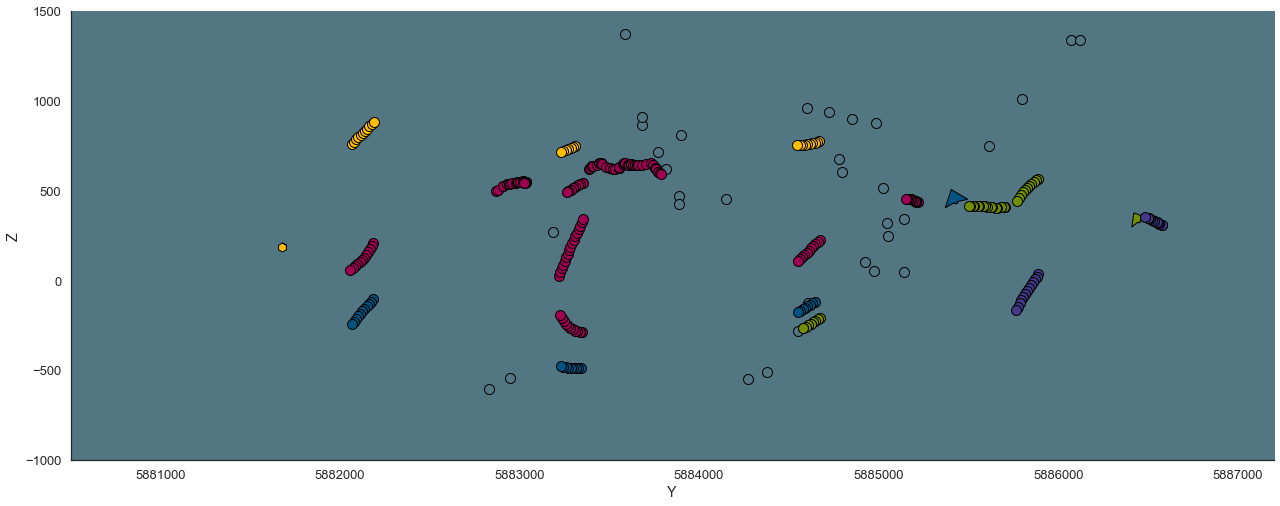

In [28]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=25, direction='x', show_data=True)

In [ ]:
geo_model.surfaces

With `cell_number=25` and remembering that we defined our resolution to be 50 cells in each direction, we have chosen a section going through the middle of our block. We have moved 25 cells in `direction='y'`, the plot thus depicts a plane parallel to the $x$- and $y$-axes. Setting `plot_data=True`, we could plot original data together with the results. Changing the values for `cell_number`and `direction`, we can move through our 3D block model and explore it by looking at different 2D planes.

We can do the same with out lithological scalar-field solution:

In [32]:
geo_model.orientations

X          Y        Z       X_r       Y_r       Z_r           G_x       G_y       G_z  dip  azimuth  polarity                    surface        series  id  order_series  smooth
43  426802.0  5886299.0  448.579  0.746776  0.664715  0.502290  8.365163e-01 -0.224144  0.500000   60      105         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
44  420843.0  5884201.0  202.204  0.347280  0.524064  0.485773  7.351479e-01 -0.553974  0.390731   67      127         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
45  425432.0  5884600.0  351.198  0.654930  0.550813  0.495761 -3.248343e-01 -0.244780  0.913545   24      233         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
46  426697.0  5885889.0  297.239  0.739736  0.637229  0.492144  8.269692e-01 -0.284748  0.484810   61      109         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
47  425946.0  5886046.0  158.606  0.689389  0.647754  0.482850 -8.654978e-01  0.030224  0.500000   60      272         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
48  425644.0  5885074.0  232.254  0.669142  0.582590  0.487787  6.517694e-01 -0.527792  0.544639   57      129         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
49  425319.0  5884808.0  302.948  0.647354  0.564758  0.492527 -9.402558e-01 -0.199858  0.275637   74      258         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
50  422540.0  5885429.0  431.198  0.461048  0.606390  0.501125  5.606110e-02 -0.353956  0.933580   21      171         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
51  424407.0  5886333.0  117.931  0.586213  0.666995  0.480123 -1.121819e-02 -0.642690  0.766044   40      181         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
52  424405.0  5885504.0  166.169  0.586079  0.611418  0.483357 -4.506065e-01 -0.055328  0.891007   27      263         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
53  424633.0  5885808.0  126.369  0.601364  0.631798  0.480689 -6.985024e-01  0.387186  0.601815   53      299         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
54  424788.0  5886881.0  131.704  0.611756  0.703733  0.481046 -8.528619e-01  0.228524  0.469472   62      285         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
55  424339.0  5886085.0  135.230  0.581654  0.650369  0.481283 -3.681129e-01 -0.381192  0.848048   32      224         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
56  426450.0  5884938.0  128.597  0.723177  0.573473  0.480838  5.892487e-01 -0.569031  0.573576   55      134         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
57  425186.0  5885324.0  153.012  0.638438  0.599351  0.482475 -8.744865e-01  0.015264  0.484810   61      271         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
58  426310.0  5884666.0  323.315  0.713792  0.555238  0.493892  7.298698e-01 -0.371887  0.573576   55      117         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
59  424885.0  5885353.0  155.132  0.618258  0.601295  0.482617 -9.458465e-01  0.099412  0.309017   72      276         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
60  425682.0  5884757.0  360.470  0.671690  0.561338  0.496383 -8.712678e-01  0.317116 -0.374607   68      110        -1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
61  426385.0  5886282.0  306.790  0.718820  0.663576  0.492784 -4.682901e-01  0.125478  0.874620   29      285         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
62  426107.0  5884196.0  410.678  0.700182  0.523729  0.499749  1.879842e-01 -0.655579  0.731354   43      164         1       03_Bronllwyd_Grit_Fm  Strat_Series  14            14    0.01
63  426347.0  5886539.0  325.330  0.716272  0.680805  0.494027 

In [31]:
geo_model.surface_points


X             Y            Z       X_r       Y_r       Z_r                 surface        series  id  order_series        smooth
6053  424206.217773  5.883052e+06  -722.016968  0.572752  0.447035  0.423812                Fault_01      Fault_01   1             1  1.000000e-08
6054  425040.057617  5.882351e+06  1416.398682  0.628654  0.400016  0.567173                Fault_01      Fault_01   1             1  1.000000e-08
6055  424860.021484  5.882099e+06  1427.837280  0.616584  0.383111  0.567940                Fault_01      Fault_01   1             1  1.000000e-08
6056  424672.783691  5.881755e+06  1498.789795  0.604031  0.360090  0.572697                Fault_01      Fault_01   1             1  1.000000e-08
6057  424574.248535  5.881588e+06  1538.491333  0.597425  0.348894  0.575358                Fault_01      Fault_01   1             1  1.000000e-08
6058  424521.704590  5.881503e+06  1540.352051  0.593903  0.343211  0.575483                Fault_01      Fault_01   1             1  1.000000e-08
6059  424461.078613  5.881425e+06  1528.851318  0.589838  0.337974  0.574712                Fault_01      Fault_01   1             1  1.000000e-08
6060  424393.222656  5.881356e+06  1508.369141  0.585289  0.333302  0.573339                Fault_01      Fault_01   1             1  1.000000e-08
6061  424124.835938  5.881111e+06  1347.217773  0.567296  0.316903  0.562535                Fault_01      Fault_01   1             1  1.000000e-08
6062  423989.698975  5.880980e+06  1283.725708  0.558237  0.308105  0.558279                Fault_01      Fault_01   1             1  1.000000e-08
6063  423922.182129  5.880909e+06  1263.202759  0.553710  0.303386  0.556903                Fault_01      Fault_01   1             1  1.000000e-08
6064  423845.392578  5.880849e+06  1242.907349  0.548562  0.299316  0.555542                Fault_01      Fault_01   1             1  1.000000e-08
6065  423616.480713  5.880658e+06  1210.405273  0.533216  0.286549  0.553363                Fault_01      Fault_01   1             1  1.000000e-08
6066  422782.640625  5.881360e+06  -928.010376  0.477315  0.333568  0.410002                Fault_01      Fault_01   1             1  1.000000e-08
6067  422858.714355  5.881424e+06  -921.831787  0.482415  0.337897  0.410416                Fault_01      Fault_01   1             1  1.000000e-08
6068  423088.342041  5.881611e+06  -875.212891  0.497809  0.350404  0.413542                Fault_01      Fault_01   1             1  1.000000e-08
6069  423155.858887  5.881681e+06  -854.689880  0.502335  0.355124  0.414918                Fault_01      Fault_01   1             1  1.000000e-08
6070  423290.995850  5.881812e+06  -791.197815  0.511395  0.363922  0.419174                Fault_01      Fault_01   1             1  1.000000e-08
6071  423488.354736  5.881998e+06  -666.517944  0.524626  0.376367  0.427533                Fault_01      Fault_01   1             1  1.000000e-08
6072  423559.382324  5.882057e+06  -630.046509  0.529388  0.380321  0.429978                Fault_01      Fault_01   1             1  1.000000e-08
6073  423627.238525  5.882127e+06  -609.564270  0.533937  0.384993  0.431351                Fault_01      Fault_01   1             1  1.000000e-08
6074  423687.864746  5.882205e+06  -598.063660  0.538002  0.390230  0.432122                Fault_01      Fault_01   1             1  1.000000e-08
6075  423740.408447  5.882289e+06  -599.924316  0.541524  0.395913  0.431997                Fault_01      Fault_01   1             1  1.000000e-08
6076  423838.943359  5.882456e+06  -639.625916  0.548130  0.407108  0.429336                Fault_01      Fault_01   1             1  1.000000e-08
6077  424026.181396  5.882800e+06  -710.578308  0.560683  0.430130  0.424579                Fault_01      Fault_01   1             1  1.000000e-08
6078  424088.445557  5.882878e+06  -714.124146  0.564857  0.435356  0.424341                Fault_01      Fault_01   1             1  1.000000e-08
6079  423255.177490  5.881470e+06  -446.731873  0

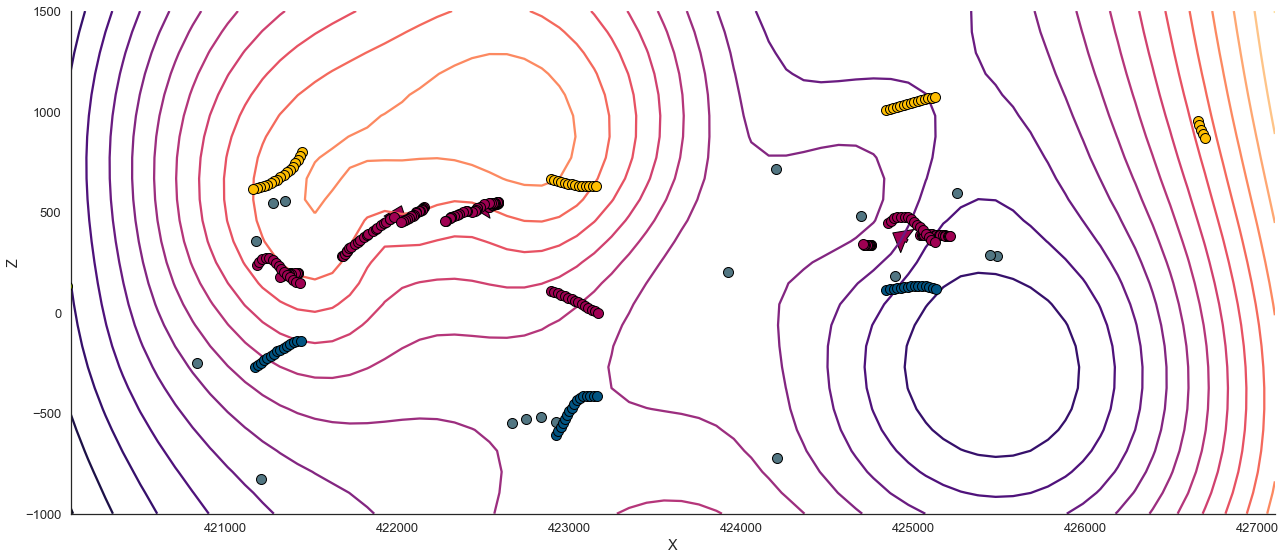

In [30]:
gp.plot.plot_scalar_field(geo_model, cell_number=25, N=15, series=0, 
                          direction='y', show_data=True, alpha=0)

This illustrates well the fold-related deformation of the stratigraphy, as well as the way the layers are influenced by the fault.

The fault network modeling solutions can be visualized in the same way:

In [ ]:
gp.plot.plot_section(geo_model, cell_number=25, block=geo_model.solutions.block_matrix[0, 0], show_data=False)

### Marching cubes and vtk visualization

In addition to 2D sections we can extract surfaces to visualize in 3D renderers. Surfaces can be visualized as 3D triangle complexes in VTK (see function plot_surfaces_3D below). To create these triangles, we need to extract respective vertices and simplices from the potential fields of lithologies and faults. This process is automatized in GemPy with the function get_surface

In [ ]:
ver , sim = gp.get_surfaces(geo_model)

In [ ]:
#gp.plot.plot_3D(geo_model)

Using the rescaled interpolation data, we can also run our 3D VTK visualization in an interactive mode which allows us to alter and update our model in real time. Similarly to the interactive 3D visualization of our input data, the changes are permamently saved (in the InterpolationInput dataframe object). Addtionally, the resulting changes in the geological models are re-computed in real time.

### Compute at a given location

This is done by modifing the grid to a custom grid and recomputing. Notice that the results are given as *grid + surfaces_points_ref + surface_pontints_rest locations*

In [ ]:
x_i = np.array([[3,5,6]])
sol = gp.compute_model_at(x_i, geo_model)

Therefore if we just want the value at **x_i**:

In [ ]:
sol[0][0, :x_i.shape[0]]

### Save the model

GemPy uses  Python [pickle] for fast storing temporary objects (https://docs.python.org/3/library/pickle.html). However, module version consistency is required. For loading a pickle into GemPy, you have to make sure that you are using the same version of pickle and dependent modules (e.g.: `Pandas`, `NumPy`) as were used when the data was originally stored.

For long term-safer storage we can export the `pandas.DataFrames` to csv by using:

In [ ]:
gp.save_model(geo_model, path=os.pardir+'/data/gempy_models')

In [ ]:
import pandas
pandas.__version__